In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	7
float64		column 3	21
float64		column 4	14
float64		column 5	7
float64		column 6	21
float64		column 7	14
float64		column 8	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1477.000000,1477.000000,1463.000000,1470.000000,1477.000000,1463.000000,1470.000000,1463.000000
mean,0.499465,0.499682,0.499733,0.261238,0.504739,0.007608,0.499823,0.275762
std,0.136337,0.123118,0.085496,0.137228,0.048464,0.076219,0.057899,0.106284
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

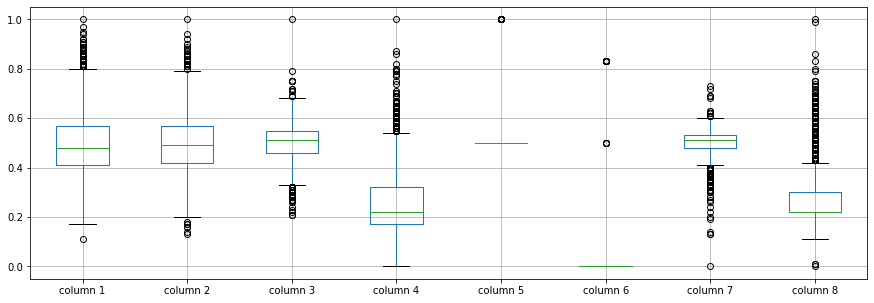

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499465
column 2    0.499682
column 3    0.499733
column 4    0.261238
column 5    0.504739
column 6    0.007608
column 7    0.499823
column 8    0.275762
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.580685,-0.163128,0.154445,0.066246,0.006718,0.086609,-0.129527
column 2,0.580685,1.000000,-0.257538,0.139871,0.046259,0.000930,0.085639,-0.105579
column 3,-0.163128,-0.257538,1.000000,0.044603,-0.007852,0.010038,-0.154425,-0.004304
column 4,0.154445,0.139871,0.044603,1.000000,-0.005720,-0.009009,-0.106740,-0.056311
column 5,0.066246,0.046259,-0.007852,-0.005720,1.000000,-0.009500,0.043726,0.003096
column 6,0.006718,0.000930,0.010038,-0.009009,-0.009500,1.000000,0.021085,-0.036340
column 7,0.086609,0.085639,-0.154425,-0.106740,0.043726,0.021085,1.000000,0.093512
column 8,-0.129527,-0.105579,-0.004304,-0.056311,0.003096,-0.036340,0.093512,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+71,8+71+71,8+71+71+71,8+71+71+71+71,8+71+71+71+71+71,8+71+71+71+71+71+71,8+71+71+71+71+71,8+71+71+71+71,8+71+71+71,8+71+71,8+71,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.781576612721319
Epoch: 1 , loss: 2.3718173529790794
Epoch: 2 , loss: 2.2012584960978963
Epoch: 3 , loss: 2.0692756383315376
Epoch: 4 , loss: 1.937218532614086
Epoch: 5 , loss: 1.8662607630957728
Epoch: 6 , loss: 1.7914607511914296
Epoch: 7 , loss: 1.7023816186448801
Epoch: 8 , loss: 1.6285940382791602
Epoch: 9 , loss: 1.5887544932572737
Epoch: 10 , loss: 1.5374906646168751
Epoch: 11 , loss: 1.486583587916001
Epoch: 12 , loss: 1.4499066640501437
Epoch: 13 , loss: 1.405712138051572
Epoch: 14 , loss: 1.3767423668633336
Epoch: 15 , loss: 1.3431548476219177
Epoch: 16 , loss: 1.3071005564668905
Epoch: 17 , loss: 1.3025030046701431
Epoch: 18 , loss: 1.2663041301395581
Epoch: 19 , loss: 1.236838081608648
Epoch: 20 , loss: 1.2350623594677967
Epoch: 21 , loss: 1.2161314733650372
Epoch: 22 , loss: 1.2044671411099641
Epoch: 23 , loss: 1.1678675257641336
Epoch: 24 , loss: 1.1681770643462306
Epoch: 25 , loss: 1.141

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.430000
column 2    0.440000
column 3    0.438488
column 4    0.220000
column 5    0.500000
column 6    0.000000
column 7    0.510000
column 8    0.220000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1.9886673392188672, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.04239854265829082

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_NN_1(imp).xlsx", index=False, header=False)